# Pyber Ride Sharing

Analysis:

Oberservation 1: 
    As a Pyber driver, they can earn more by working in the city since the highest percent of total fares is in the urban areas. 
    
Oberservation 2: 
    A person who is using Pyber to get a ride in a rural area on average will most likely be paying more for their ride, compared to a person who is getting a ride in the city. Getting a Pyber ride in the city will cost less on average.

Observation 3: 
    The demand for drivers is higher in the city so they will be giving more rides on average compared to suburban and urban areas.


In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Create filepaths
filepath = os.path.join(".","raw_data","city_data.csv")
filepath2 = os.path.join(".", "raw_data","ride_data.csv")
#Data Frames
driver_city_df = pd.read_csv(filepath)
city_rides_df = pd.read_csv(filepath2)


In [17]:
#merge_table = pd.merge(info_pd, items_pd, on="customer_id", how="outer")
merge_table = pd.merge(city_rides_df, driver_city_df, how="outer", on="city")
merge_table.head()
merge_table["total_rides"]= 1
#merge_table.head()

In [4]:
# * Average Fare ($) Per City
#merge_table.loc[:,["city","fare","driver_count","type"]]
# avg_city_fare = merge_table.groupby(["city"]).mean()["fare"]
# avg_city_fare = avg_city_fare.round(2)
#avg_city_fare.head()
#driver count
driver_count = merge_table.groupby(["city", "driver_count", "type"])
driver_count = driver_count.sum()
#driver_count.head()


In [5]:
driver_count["avg_fare"] = (driver_count["fare"] / driver_count["total_rides"]).round(2)
#driver_count.head()

In [6]:
new_df = driver_count.reset_index()

In [7]:
new_df.head()

,city,driver_count,type,fare,ride_id,total_rides,avg_fare
0,Alvarezhaven,21,Urban,741.79,165899161874789,31,23.93
1,Alyssaberg,67,Urban,535.85,91953627077845,26,20.61
2,Anitamouth,16,Suburban,335.84,37762826439863,9,37.32
3,Antoniomouth,21,Urban,519.75,111909606921566,22,23.62
4,Aprilchester,49,Urban,417.65,86920968698689,19,21.98


In [8]:
#Make Dataframes for every city type
urban_df = new_df.loc[new_df["type"]== "Urban",:]
suburban_df = new_df.loc[new_df["type"]== "Suburban",:]
rural_df = new_df.loc[new_df["type"]== "Rural",:]

In [9]:
#new_df.plot.scatter(x='a', y='b', s=df['c']*200);
#urban, suburban, rural
size = 8*new_df["driver_count"]
plt.scatter(urban_df["total_rides"],urban_df["avg_fare"], marker="o", c="lightcoral", edgecolors="black", s=size, alpha=0.75)
plt.scatter(suburban_df["total_rides"],suburban_df["avg_fare"] , marker="o", c="lightskyblue", edgecolors="black", s=size, alpha=0.75)
plt.scatter(rural_df["total_rides"],rural_df["avg_fare"], marker="o", c="gold", edgecolors="black", s=size, alpha=0.75)
None

In [10]:
# Create a title, x label, and y label for our chart
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Rides per City")
plt.ylabel("Average Fare per City")
None

In [11]:
plt.legend( ('Urban', 'Suburban', 'Rural') )
None

# Bubble Plot of Ride Sharing Data

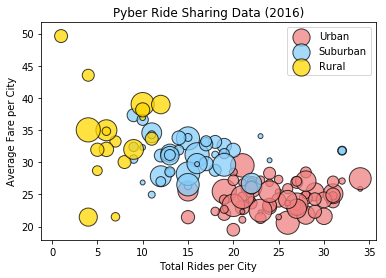

In [12]:
plt.show()

# % of Total Fares by City Type

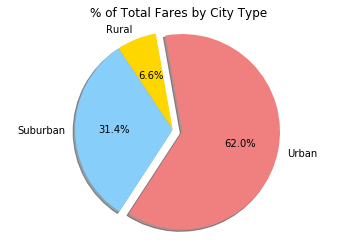

In [13]:
group_type = new_df.groupby('type')
#group_type.sum() to check for the total fares
# fare_type = group_type['fare'].sum()
# fare_type
city_type = ["Rural", "Suburban", "Urban"]
fare = [4255.09, 20335.69, 40078.34]
color = ["gold", "lightskyblue", "lightcoral"]
explode = (0, 0, 0.1)
plt.pie(fare, explode=explode, labels=city_type, colors=color, autopct='%1.1f%%',shadow=True, startangle=100)
plt.title("% of Total Fares by City Type")
plt.axis('equal')
plt.show()

# % of Total Rides by City Type

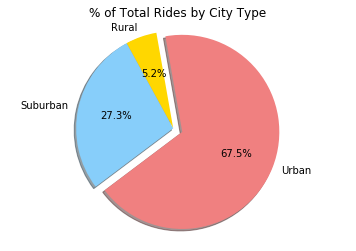

In [14]:
#group_type.sum() to check for the number of total rides
city_type = ["Rural", "Suburban", "Urban"]
rides = [125, 657, 1625]
color = ["gold", "lightskyblue", "lightcoral"]
explode = (0, 0, 0.1)
plt.pie(rides, explode=explode, labels=city_type, colors=color, autopct='%1.1f%%',shadow=True, startangle=100)
plt.title("% of Total Rides by City Type")
plt.axis('equal')
plt.show()

# % of Total Drivers by City Type

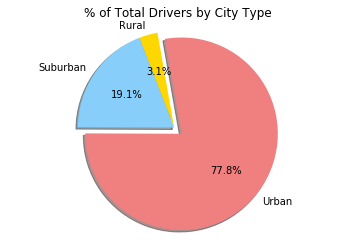

In [15]:

#group_type.sum() to check for the number of drivers
city_type = ["Rural", "Suburban", "Urban"]
drives = [104, 638, 2607]
color = ["gold", "lightskyblue", "lightcoral"]
explode = (0.0, 0.0, 0.1)
plt.pie(drives, explode=explode, labels=city_type, colors=color, autopct='%1.1f%%',shadow=True, startangle=100)
plt.title("% of Total Drivers by City Type")
plt.axis('equal')
plt.show()